# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Parameters
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create a loop to find eah city
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q="
        weather_response = requests.get(f'{query_url}{city}').json()
        city_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
         print(f"City {city} not found. Skipping to next city.")
    pass
    time.sleep(1)
    
# Print complete logs
print("-----------------------------")
print("End of Data Retrieval     ")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | ushuaia
Processing Record 2 | callaway
Processing Record 3 | leningradskiy
Processing Record 4 | ponta do sol
Processing Record 5 | puerto del rosario
Processing Record 6 | ambilobe
Processing Record 7 | ribeira grande
Processing Record 8 | cayenne
Processing Record 9 | eyl
Processing Record 10 | punta arenas
Processing Record 11 | luderitz
Processing Record 12 | ust-nera
Processing Record 13 | tuktoyaktuk
Processing Record 14 | hobart
City umzimvubu not found. Skipping to next city.
Processing Record 15 | rikitea
Processing Record 16 | carballo
Processing Record 17 | tukrah
Processing Record 18 | lebu
Processing Record 19 | hermanus
Processing Record 20 | providencia
Processing Record 21 | cape town
Processing Record 22 | kapaa
Processing Record 23 | chokurdakh
City illoqqortoormiut not found. Skipping to next city.
Processing Record 24 | albany
Processing Record 25 | hilo
Processing Record 26 | tautira


Processing Record 220 | fairbanks
Processing Record 221 | bireun
City boatlaname not found. Skipping to next city.
Processing Record 222 | brownsville
Processing Record 223 | pelagiada
Processing Record 224 | launceston
Processing Record 225 | chuy
Processing Record 226 | sorong
Processing Record 227 | sola
Processing Record 228 | kenai
Processing Record 229 | mbanza-ngungu
Processing Record 230 | broome
Processing Record 231 | bhimunipatnam
Processing Record 232 | mikhaylovka
Processing Record 233 | dongsheng
Processing Record 234 | georgetown
Processing Record 235 | airai
Processing Record 236 | san ignacio
Processing Record 237 | iqaluit
Processing Record 238 | coahuayana
Processing Record 239 | sitges
Processing Record 240 | rawson
City pakwach not found. Skipping to next city.
Processing Record 241 | mineiros
Processing Record 242 | mayo
Processing Record 243 | te anau
City saleaula not found. Skipping to next city.
Processing Record 244 | rio gallegos
Processing Record 245 | san 

Processing Record 431 | bulgan
Processing Record 432 | ranong
Processing Record 433 | salalah
Processing Record 434 | kaeo
Processing Record 435 | la baneza
Processing Record 436 | san ramon
Processing Record 437 | necochea
Processing Record 438 | tomobe
Processing Record 439 | aripuana
Processing Record 440 | kyren
Processing Record 441 | marawi
Processing Record 442 | ginda
Processing Record 443 | sayyan
Processing Record 444 | walvis bay
Processing Record 445 | novo aripuana
Processing Record 446 | kunming
Processing Record 447 | tromso
Processing Record 448 | bandarbeyla
City kuche not found. Skipping to next city.
Processing Record 449 | robertsport
Processing Record 450 | guymon
Processing Record 451 | camopi
Processing Record 452 | kristinehamn
Processing Record 453 | novopavlovka
Processing Record 454 | matveyevka
Processing Record 455 | meghraj
Processing Record 456 | sakakah
City araguatins not found. Skipping to next city.
Processing Record 457 | old saybrook
Processing Reco

In [24]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=3983295a132686d7550084d3f7f4c193&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Create the data frame
cities_pd = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

# Save Data to csv
cities_pd.to_csv("Cities_Output.csv")

#Display DataFrame
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,278.96,61,90,8.23,AR,1628062052
1,Callaway,30.1530,-85.5699,297.11,96,1,0.45,US,1628062052
2,Leningradskiy,69.3833,178.4167,280.20,92,94,1.75,RU,1628062053
3,Ponta do Sol,32.6667,-17.1000,295.38,78,17,2.51,PT,1628062053
4,Puerto del Rosario,28.5004,-13.8627,295.01,68,75,6.69,ES,1628062053


In [13]:
# Statistical Analysis
# Find the count, mean, standard deviation, min, max,and quartiles of the data
cities_pd.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,18.270043,21.704893,294.661911,68.314286,55.566071,3.551964,1.628063e+09
std,33.225831,90.109680,8.040084,22.295811,39.828873,2.612183,2.661817e+02
min,-54.800000,-175.200000,274.890000,7.000000,0.000000,0.000000,1.628062e+09
25%,-8.259175,-55.954375,289.180000,54.000000,12.000000,1.577500,1.628062e+09
50%,20.912850,25.150750,295.225000,74.000000,66.000000,2.945000,1.628063e+09
75%,45.566725,102.090550,300.442500,86.000000,97.250000,4.902500,1.628063e+09
max,78.218600,179.316700,316.080000,100.000000,100.000000,14.400000,1.628063e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
# Check for cities with humidity > 100%
cities_hum_df = cities_pd[cities_pd["Humidity"] > 100]
cities_hum_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [20]:
#No cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

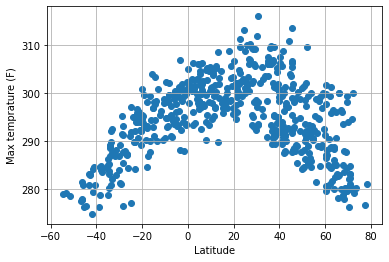

In [23]:
# Create a scatter plot showing the city latitude vs max temperature
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max temprature (F)')
plt.title('City Latitude vs. Max Temperature (F) 8/3/2021')
plt.grid()
plt.savefig('Figures/Latitude_MaxTemperature_Plot.png')

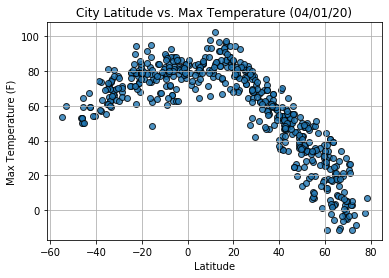

## Latitude vs. Humidity Plot

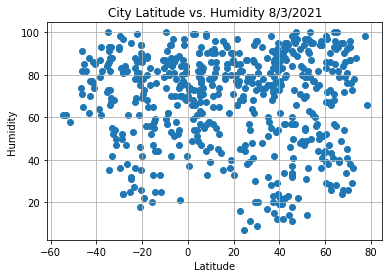

In [27]:
# Create a scatter plot showing the city latitude vs humidity
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity 8/3/2021')
plt.grid()
plt.savefig('figures/Latitude_Humidity_Plot.png')

## Analysis of plot lat vs humidity


## Latitude vs. Cloudiness Plot

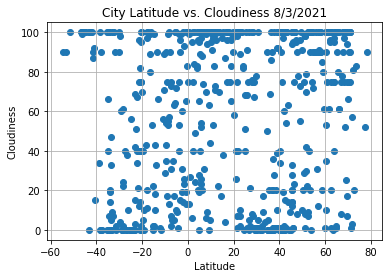

In [29]:
# Create a scatter plot showing the city latitude vs cloudiness
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness 8/3/2021')
plt.grid()
plt.savefig('figures/Latitude_Cloudiness_Plot.png')

## Analysis of plot lat vs cloudiness


## Latitude vs. Wind Speed Plot

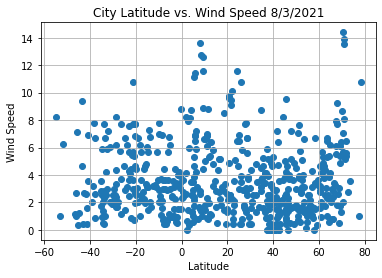

In [30]:
# Create a scatter plot showing the city latitude vs cloudiness
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed 8/3/2021')
plt.grid()
plt.savefig('figures/Latitude_Wind_Speed_Plot.png')

## Analysis of plot lat vs cloudiness


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


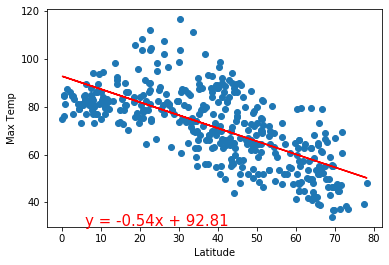

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


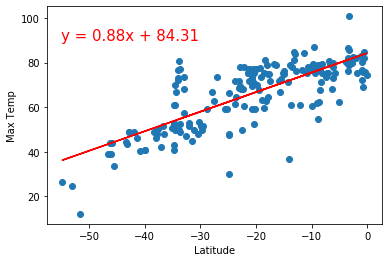

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


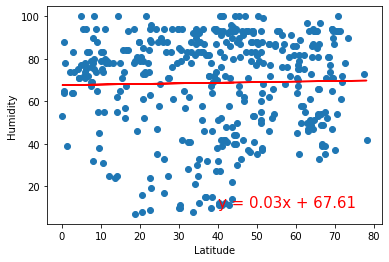

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


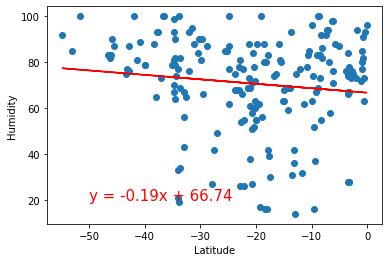

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


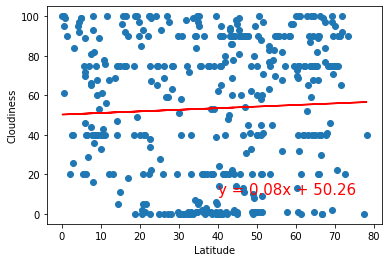

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


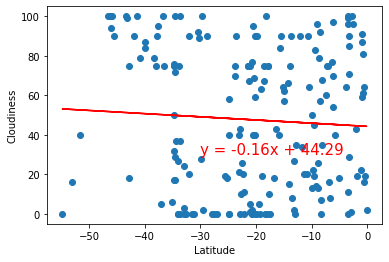

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


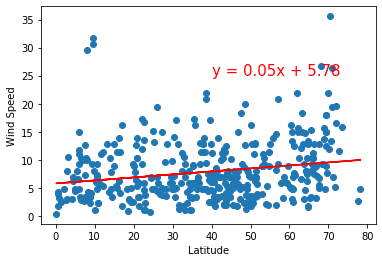

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


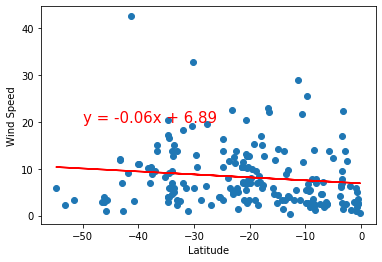